### Importing the Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Importing the Dataset

In [104]:
dataset =pd.read_excel('MRT Prediction Database for ICMIME.xlsx')

### Deal with Outliers and High Leverage Points

In [105]:
# Step 1: Remove Outliers using Z-scores
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))  # Only numeric columns
    outliers = (z_scores > threshold).any(axis=1)
    print(f"Number of outliers detected: {outliers.sum()}")
    return df[~outliers]

# Apply outlier and high leverage point removal
response_column = 'Globe temperature (°C) [MRT]'  # Replace with the actual target column name in your dataset
dataset_clean = remove_outliers_zscore(dataset)

# Dataset is now ready for any machine learning model
print(f"Shape of dataset after cleaning: {dataset_clean.shape}")

Number of outliers detected: 694
Shape of dataset after cleaning: (21033, 4)


### Printing Maximum and Minimum Values of Every Variables

In [106]:
# Print the max and min value of every variable after removing outliers
max_values = dataset_clean.max()  # Maximum values of each column
min_values = dataset_clean.min()  # Minimum values of each column

# Printing the results
print("Maximum values of each variable after removing outliers:")
print(max_values)

print("\nMinimum values of each variable after removing outliers:")
print(min_values)


Maximum values of each variable after removing outliers:
Air temperature (°C)            36.40
Radiant temperature (°C)        36.90
Air velocity (m/s)               0.93
Globe temperature (°C) [MRT]    36.60
dtype: float64

Minimum values of each variable after removing outliers:
Air temperature (°C)            12.2
Radiant temperature (°C)        12.4
Air velocity (m/s)               0.0
Globe temperature (°C) [MRT]    12.4
dtype: float64


### Cleaned Dataset for Training and Testing

In [107]:
X = dataset_clean.iloc[:, :-1]
y = dataset_clean.iloc[:, -1]

### Spliting the Dataset inti Training and Test

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling: Standardization

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # Compute the mean and std to be used for later scaling.
X_train = sc.transform(X_train) # Perform standardization by centering and scaling.
X_test = sc.transform(X_test) 

### Training the Random Forest Regression Model on the Training Set

In [110]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

### Predicting the Test set results

In [111]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [112]:
results_df = pd.DataFrame({
    'True Values (y_test)': y_test,
    'Predicted Values (y_pred)': y_pred.flatten()
})

print(results_df)

       True Values (y_test)  Predicted Values (y_pred)
10942                  18.2                  18.193500
21473                  22.7                  22.749958
8334                   23.6                  23.600000
10725                  25.7                  25.375000
9178                   31.9                  31.900000
...                     ...                        ...
3938                   26.5                  26.546250
9146                   31.3                  31.300000
1550                   23.3                  22.673500
16915                  23.0                  23.060171
4489                   22.3                  22.580000

[4207 rows x 2 columns]


In [113]:
results2_df = pd.DataFrame({
    'True Values (y_train)': y_train,
    'Predicted Values (y_pred_train)': y_pred_train.flatten()
})

print(results2_df)

       True Values (y_train)  Predicted Values (y_pred_train)
20465                   22.1                        22.080000
13696                   34.0                        34.014500
13921                   29.0                        29.038500
6435                    29.2                        29.111000
10177                   28.6                        28.673500
...                      ...                              ...
13728                   32.2                        32.200000
20341                   23.0                        23.000603
9995                    29.7                        29.701875
11008                   16.8                        16.800500
2791                    22.3                        22.251782

[16826 rows x 2 columns]


### Errors Measurement of Train Set

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
train_mse = mean_squared_error(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
train_r_squared = r2_score(y_train, y_pred_train)

print(f"\nMean Squared Error (MSE) of Train Set: {train_mse:.5f}")
print(f"Mean Absolute Error (MAE) of Train Set: {train_mae:.5f}")
print(f"Mean Absolute Percentage Error (MAPE) of Train Set: {train_mape:.5f}")
print(f"R-squared (R²) of Train Set: {train_r_squared:.5f}")


Mean Squared Error (MSE) of Train Set: 0.00617
Mean Absolute Error (MAE) of Train Set: 0.03180
Mean Absolute Percentage Error (MAPE) of Train Set: 0.00132
R-squared (R²) of Train Set: 0.99954


### Errors Measurement of Test Set

In [115]:
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_r_squared = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE) of Test Set: {test_mse:.5f}")
print(f"Mean Absolute Error (MAE) of Test Set: {test_mae:.5f}")
print(f"Mean Absolute Percentage Error (MAPE) of Test Set: {test_mape:.5f}")
print(f"R-squared (R²) of Test Set: {test_r_squared:.5f}")


Mean Squared Error (MSE) of Test Set: 0.05266
Mean Absolute Error (MAE) of Test Set: 0.07563
Mean Absolute Percentage Error (MAPE) of Test Set: 0.00315
R-squared (R²) of Test Set: 0.99607


### Model Evaluation

In [116]:
# Printing MSE for Training and Test Sets
print(f"\nTraining Set - Mean Squared Error (Random Forest MSE): {train_mse:.5f}")
print(f"Test Set - Mean Squared Error (Random Forest MSE): {test_mse:.5f}\n")

#
if abs(train_mse - test_mse) < 0.1:  # Threshold for MSE difference between train and test
    print("Random Forest Model has a Good Fit.")
elif test_mse > train_mse:
    print("Random Forest Model is Overfitting.")
else:
    print("Random Forest Model is Underfitting.")



Training Set - Mean Squared Error (Random Forest MSE): 0.00617
Test Set - Mean Squared Error (Random Forest MSE): 0.05266

Random Forest Model has a Good Fit.


### Plotting

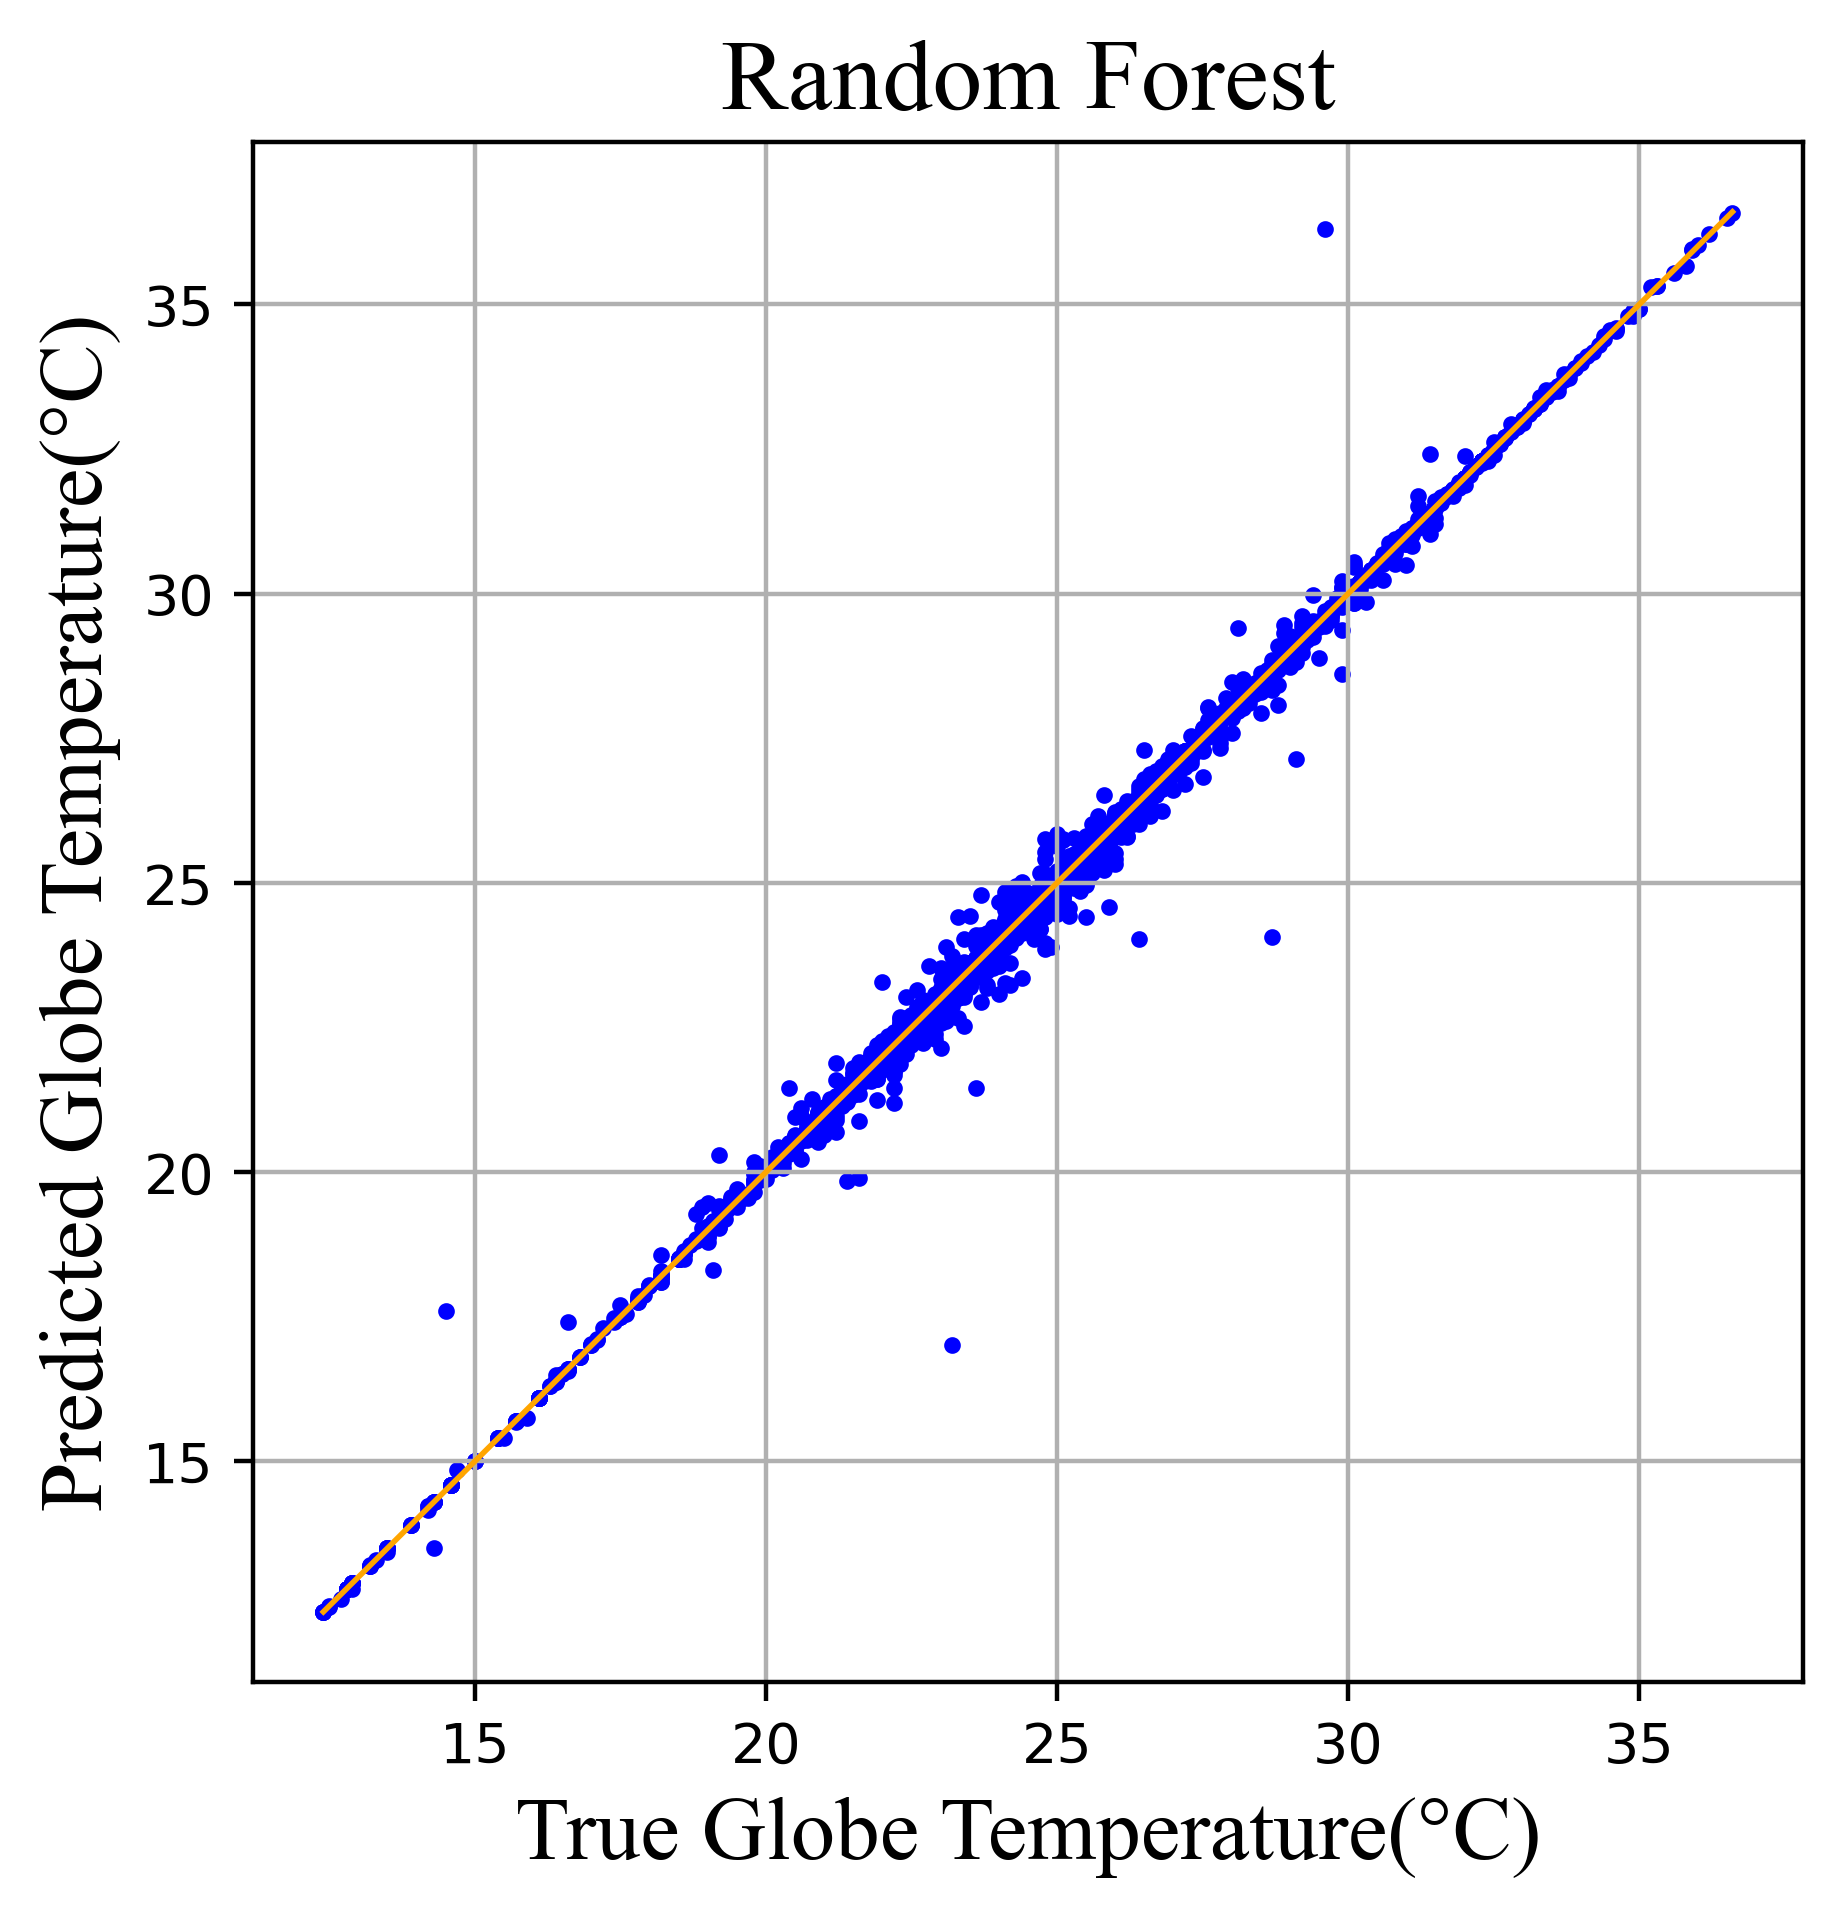

In [117]:
dpi = 400  # dots per inch
width_inch = 2000 / dpi
height_inch = 2000 / dpi

plt.figure(figsize=(width_inch, height_inch), dpi=dpi)
plt.scatter(y_test, y_pred, color='blue',s=4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', lw=1)
plt.title('Random Forest',fontname='Times New Roman', fontsize=18)
plt.xlabel('True Globe Temperature(°C)',fontname='Times New Roman', fontsize=16)
plt.ylabel('Predicted Globe Temperature(°C)',fontname='Times New Roman', fontsize=16)
plt.grid(True)
plt.show()

### Features Importance

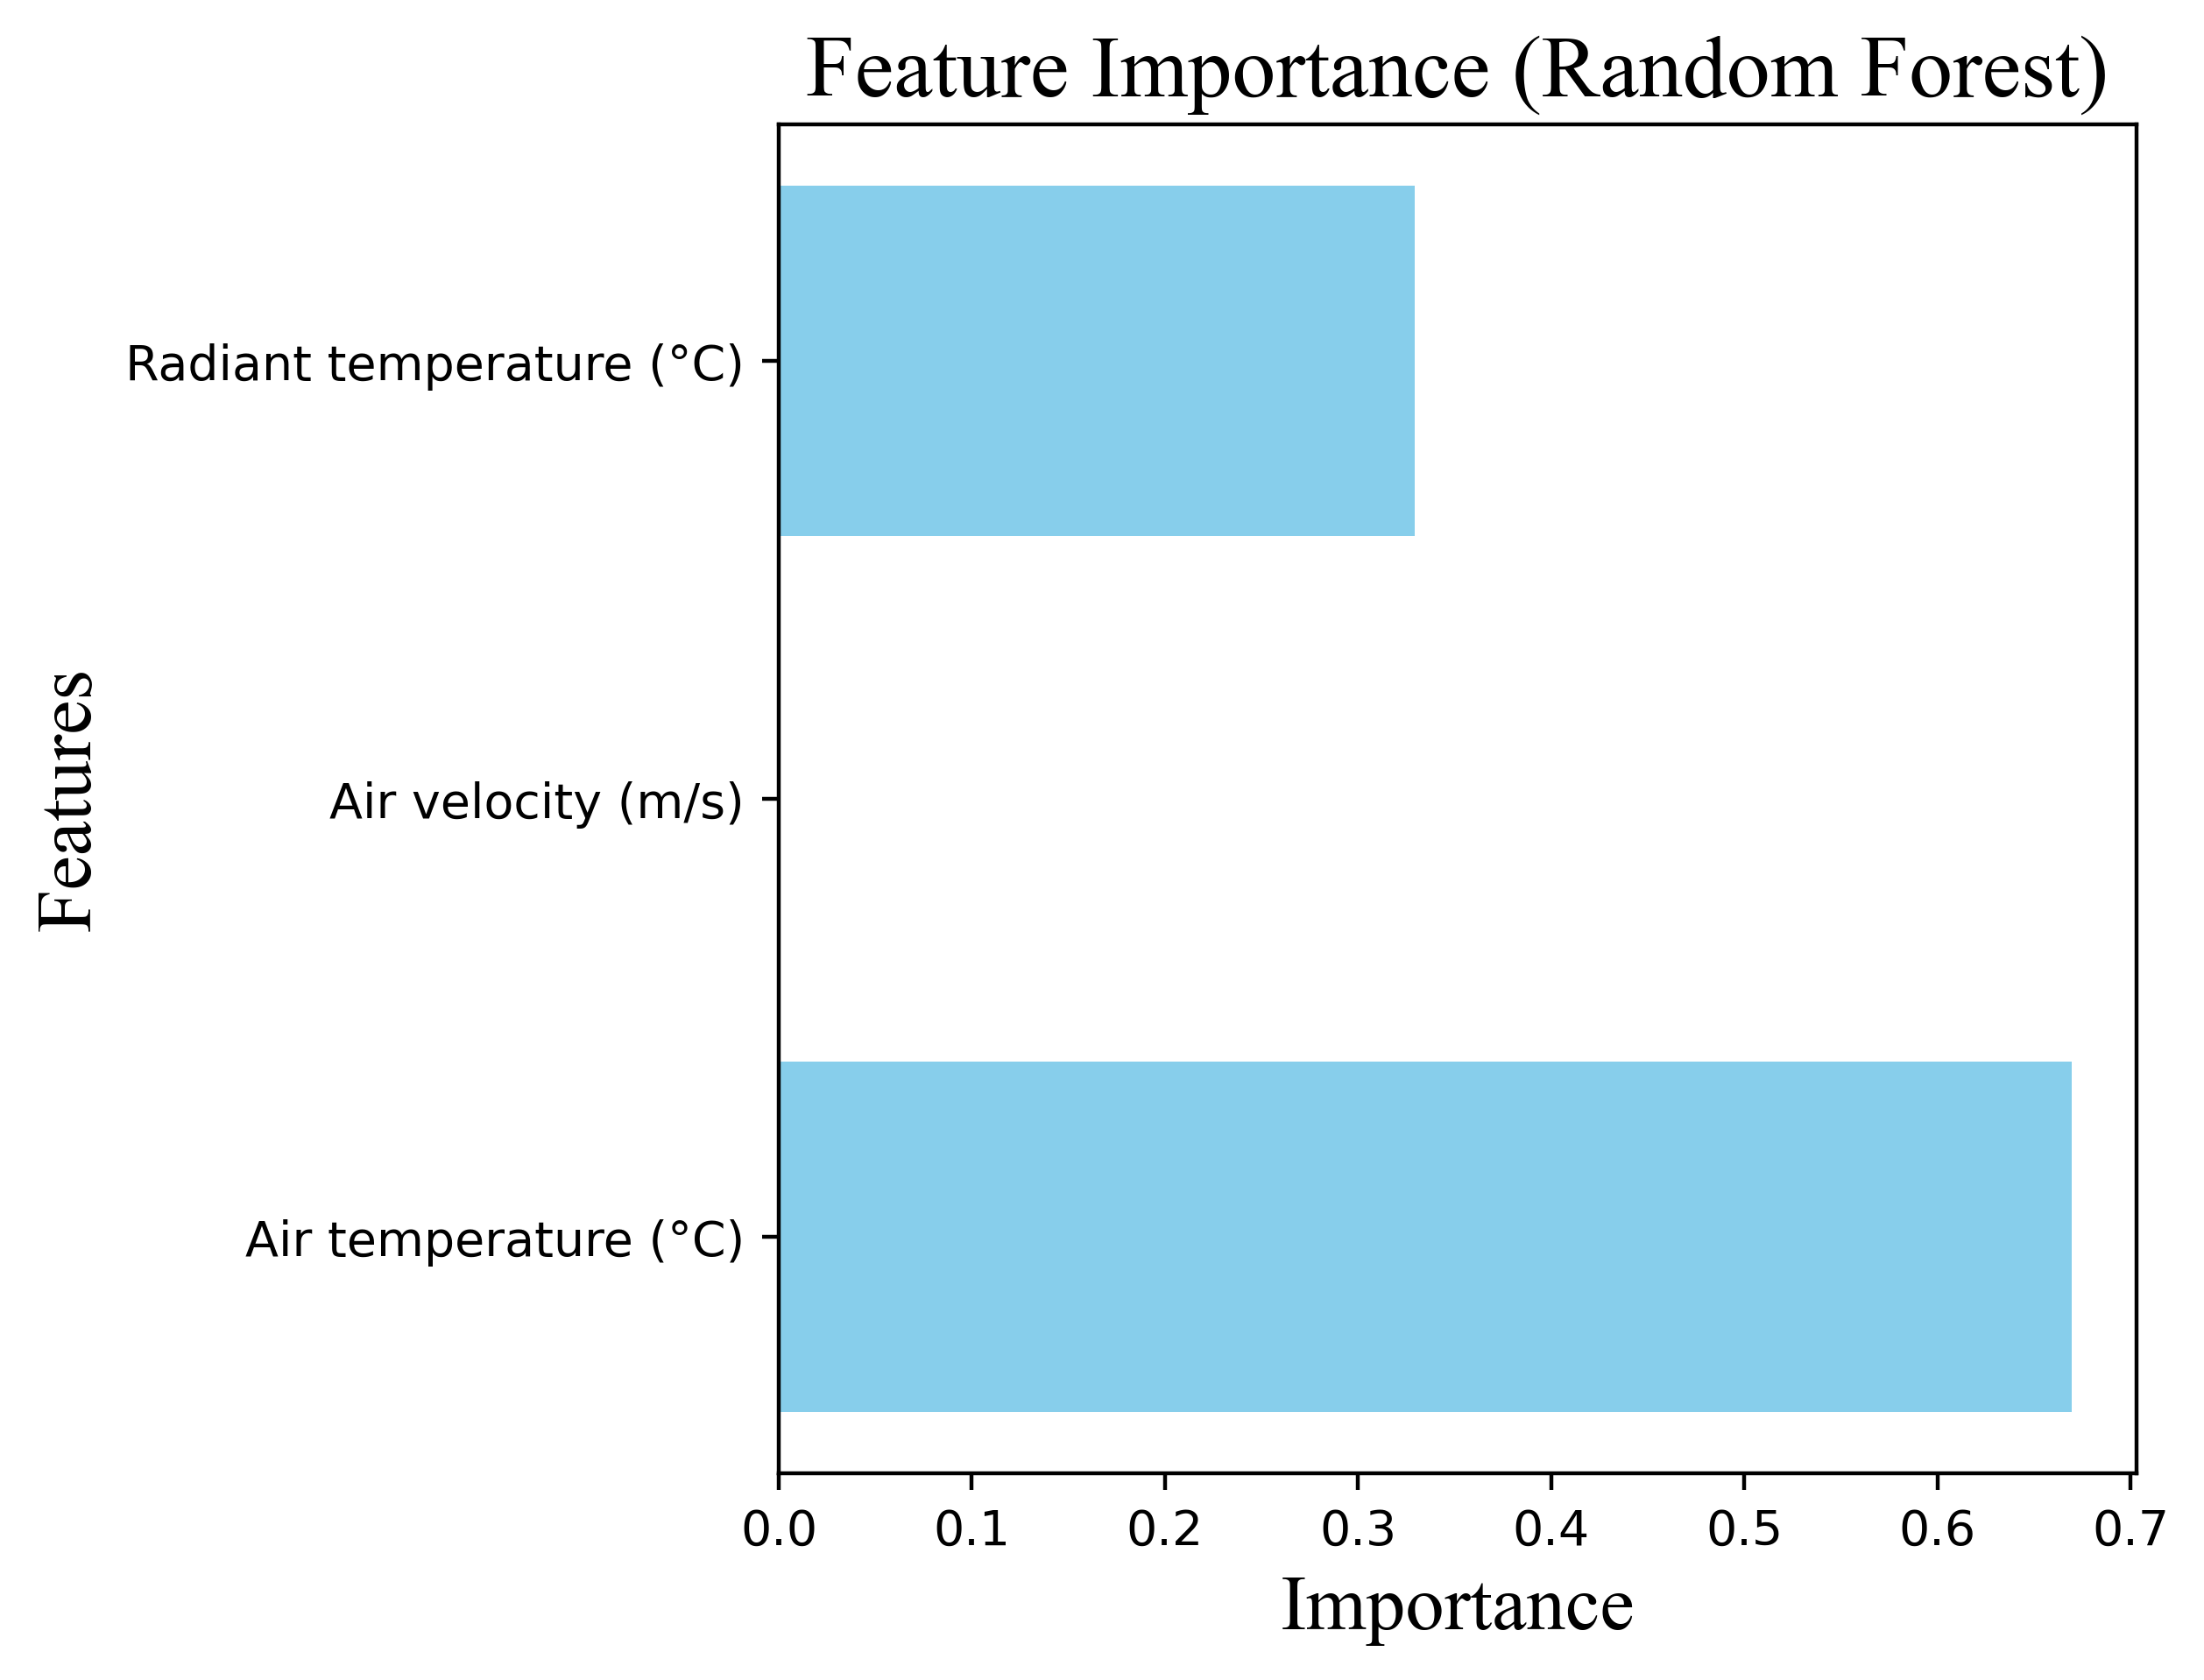

In [118]:
# Extract feature importances
feature_importances = regressor.feature_importances_

# Sort feature importances by feature names for consistency
sorted_indices = np.argsort(X.columns)  # Sort by feature names alphabetically
sorted_feature_names = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot the feature importances
dpi = 400  # dots per inch
width_inch = 2000 / dpi
height_inch = 2000 / dpi

plt.figure(figsize=(width_inch, height_inch), dpi=dpi)
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Importance', fontname='Times New Roman', fontsize=16)
plt.ylabel('Features', fontname='Times New Roman', fontsize=16)
plt.title('Feature Importance (Random Forest)', fontname='Times New Roman', fontsize=18)
plt.show()

### Plotting MSE vs. Number of Trees

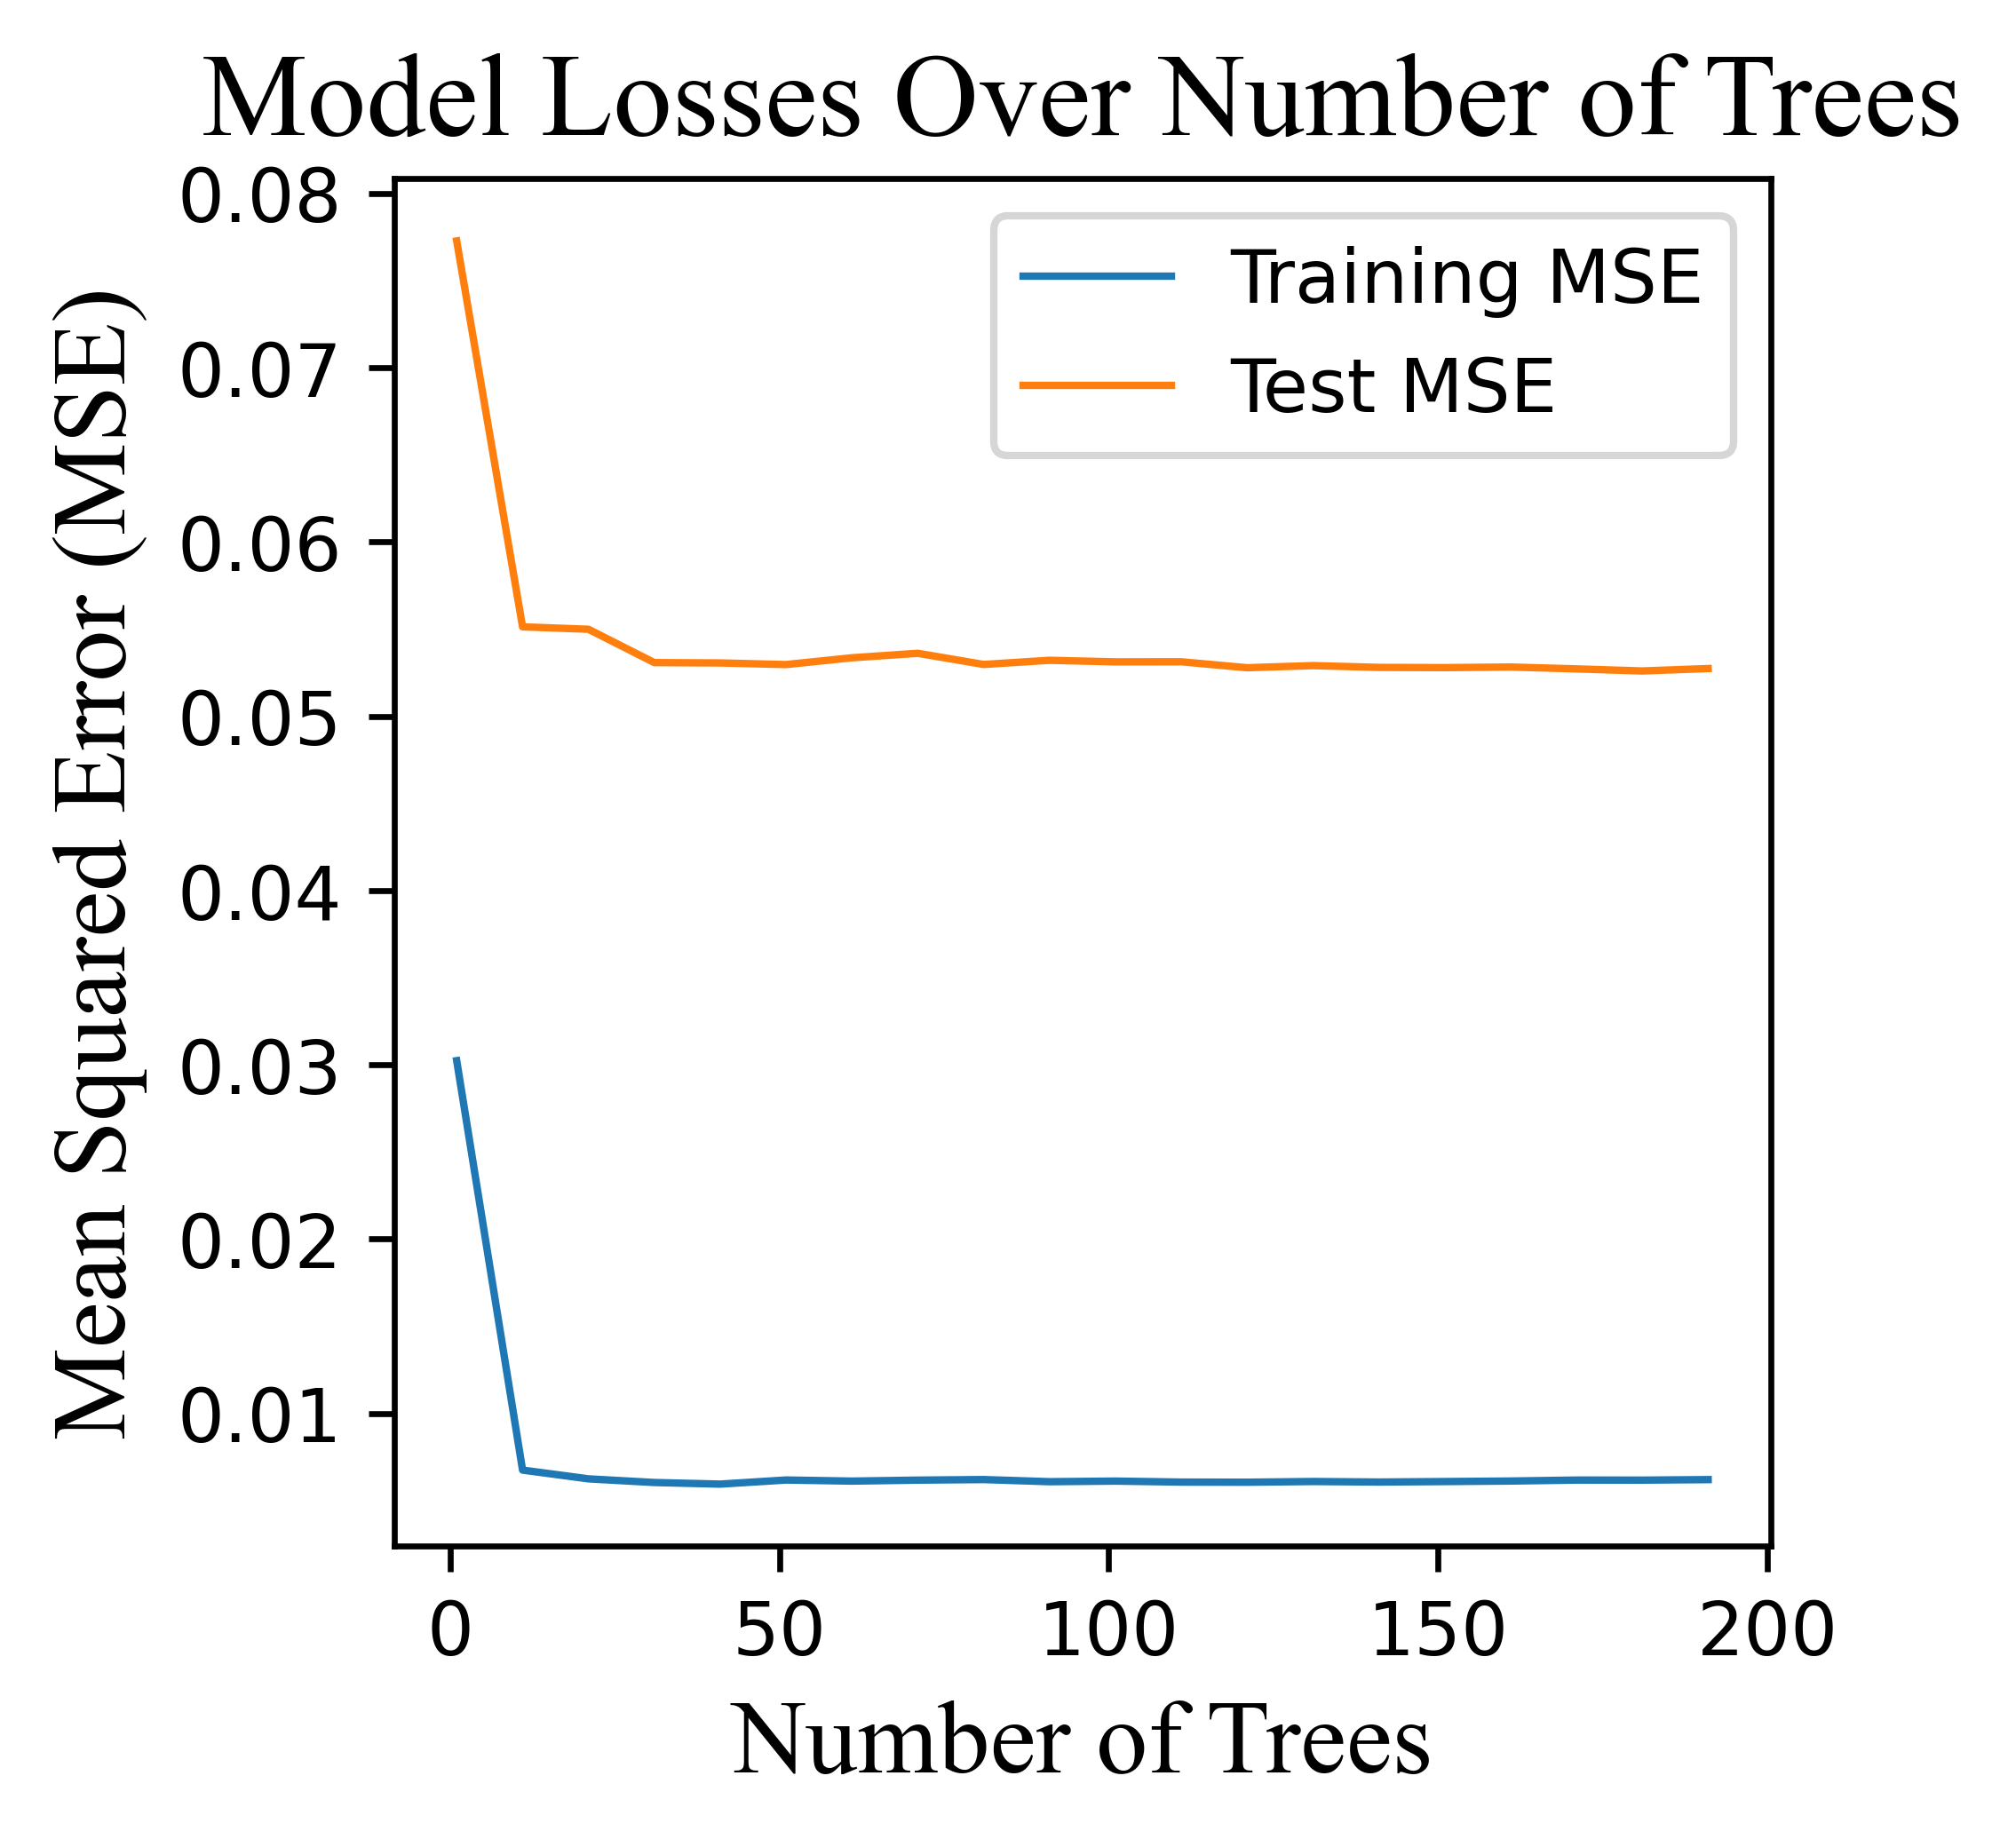

In [119]:
#Initializing Lists to Store MSE for Different Number of Trees
n_estimators_list = range(1, 201, 10)  # You can change this range as needed
train_mse_list = []
test_mse_list = []

#Loop to Train Random Forest with Different Number of Trees
for n_trees in n_estimators_list:
    regressor = RandomForestRegressor(n_estimators=n_trees, random_state=0)
    regressor.fit(X_train, y_train)
    
    # Predicting the Training Set Results
    y_train_pred_rf = regressor.predict(X_train)
    train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
    
    # Predicting the Test Set Results
    y_test_pred_rf = regressor.predict(X_test)
    test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
    
    # Appending MSEs to the lists
    train_mse_list.append(train_mse_rf)
    test_mse_list.append(test_mse_rf)

#Plotting MSE vs Number of Trees
dpi = 600  # dots per inch
width_inch = 2000 / dpi
height_inch = 2000 / dpi

plt.figure(figsize=(width_inch, height_inch), dpi=dpi)
plt.plot(n_estimators_list, train_mse_list, label='Training MSE',lw = 1)
plt.plot(n_estimators_list, test_mse_list, label='Test MSE',lw = 1)
plt.title('Model Losses Over Number of Trees',fontname='Times New Roman', fontsize=16)
plt.xlabel('Number of Trees',fontname='Times New Roman', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)',fontname='Times New Roman', fontsize=14)
plt.grid(False)
plt.legend()
plt.show()